In [348]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

#Execute all the "Jupyter notebook Non prints"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #'all' / 'last'

In [325]:
#Load the data
rated_bookings_file = './Datasets/rated_bookings_with_location.csv'
rb=pd.read_csv(rated_bookings_file)

#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])

#Load the bookings
bookings_file = './Datasets/all_bookings3.0.csv'
book=pd.read_csv(bookings_file)

book['pickup_date'] = pd.to_datetime(book['pickup_date'])
book['last_update_date'] = pd.to_datetime(book['last_update_date'])
book['booking_date'] = pd.to_datetime(book['booking_date'])



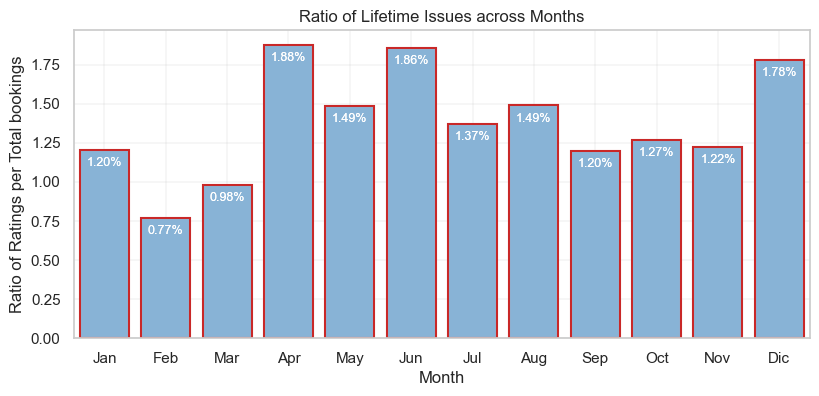

In [326]:
#Let's filter the dataset by ratings <=2


#DATA
#group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year,rb['pickup_date'].dt.month])
group = rb[rb['rating_score']<=2].groupby(rb['pickup_date'].dt.month)
g1=group.agg({'rating_score':['count', 'mean']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['pickup_date'], ascending=True)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
g1.columns=['month', 'count_issues', 'mean']
#g1

group = book.groupby(book['pickup_date'].dt.month)
g2=group.agg({'booking_id':['count']})
g2.columns=['count']
g2=g2.reset_index()
g2=g2.sort_values(by=['pickup_date'], ascending=True)
g2=g2.reset_index()
g2.drop('index', axis=1, inplace=True)
g2.columns=['month','count_total']
#g2

g3=pd.merge(g1,g2,how='left',left_on='month',right_on='month')
g3['ratio']=(g3['count_issues']/g3['count_total'])*100
#g3

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

#filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g3, x='month',y='ratio',  fill=True, order=g1['month'], color='#7bb4e3')

#ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g3, x='month',y='ratio',  fill=False, order=g1['month'], color='#c92828')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f%%', padding=-14, fontsize=9, color='white')

ax.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11], xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic']) 
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(4.5, 4.8, .05))
#ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('Ratio of Lifetime Issues across Months')

ax.set(xlabel='Month', ylabel='Ratio of Ratings per Total bookings')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


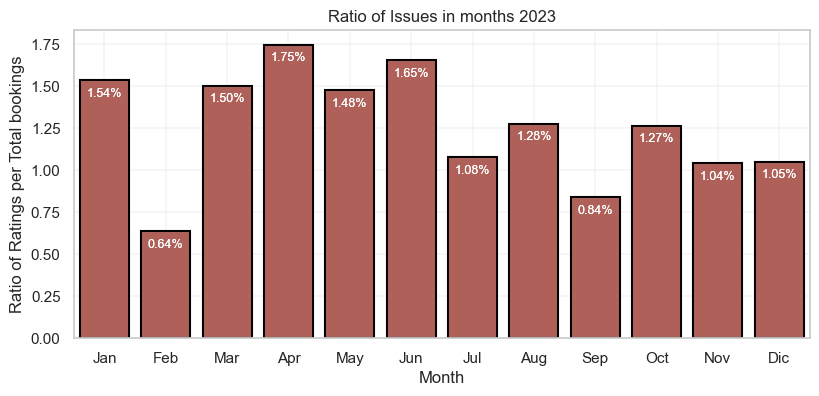

In [327]:
#2023 ONLY!!!
#Let's filter the dataset by ratings <=2
rb[rb['rating_score']<=2].shape

#DATA
#group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year,rb['pickup_date'].dt.month])
group = rb[((rb['rating_score']<=2)&(rb['pickup_date'].dt.year==2023))].groupby(rb['pickup_date'].dt.month)
g1=group.agg({'rating_score':['count', 'mean']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['pickup_date'], ascending=True)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
g1.columns=['month', 'count_issues', 'mean']
g1

group = book[book['pickup_date'].dt.year==2023].groupby(book['pickup_date'].dt.month)
g2=group.agg({'booking_id':['count']})
g2.columns=['count']
g2=g2.reset_index()
g2=g2.sort_values(by=['pickup_date'], ascending=True)
g2=g2.reset_index()
g2.drop('index', axis=1, inplace=True)
g2.columns=['month','count_total']
g2

g3=pd.merge(g1,g2,how='left',left_on='month',right_on='month')
g3['ratio']=(g3['count_issues']/g3['count_total'])*100
g3_all_years=g3

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

#filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g3, x='month',y='ratio',  fill=True, order=g1['month'], color='#bc544b')

#ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g3, x='month',y='ratio',  fill=False, order=g1['month'], color='#050002')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f%%', padding=-14, fontsize=9, color='white')

ax.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11], xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic']) 
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(4.5, 4.8, .05))
#ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('Ratio of Issues in months 2023')

ax.set(xlabel='Month', ylabel='Ratio of Ratings per Total bookings')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/1266292071.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=g3, x='month', y='ratio', alpha=.5, ci=None, legend=None)


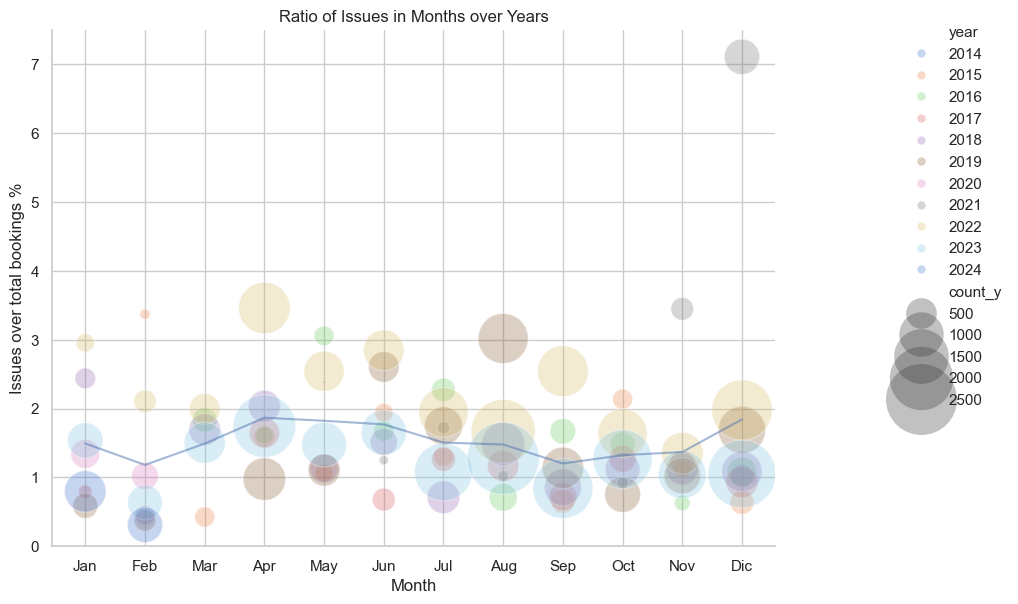

In [328]:
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['year','month'], ascending=True)
#g1

group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g2=group.agg({'booking_id':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2=g2.reset_index()
g2=g2.sort_values(by=['year','month'], ascending=True)
#g2

g3=pd.merge(g1,g2,how='left',left_on=['year','month'],right_on=['year','month'])
g3['ratio']=(g3['count_x']/g3['count_y'])*100
g3=g3.sort_values(by=['year','month'], ascending=True)
#g3.sort_values(by='month')
g3=g3[g3['count_y']>10]

#VISUALIZATION
width = 8
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

# Plot miles per gallon against horsepower with other semantics
ax=sns.relplot(data=g3, x="month", y="ratio", hue="year", size="count_y",
            sizes=(4, 2700), alpha=.3, palette="muted", height=height, aspect=(width/height))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1.00,1))

#ax.grid(linewidth=0.25)
#ax.set(linewidth=0.25)

sns.lineplot(data=g3, x='month', y='ratio', alpha=.5, ci=None, legend=None)
ax.set(xticks=[1,2,3,4,5,6,7,8,9,10,11,12], xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic']) 
ax.set(ylim=(0 ,7.5))
#ax.set(yticks=np.arange(4.5, 4.8, .05))
#ax.set_xlim(-1.5,13.5)

#legend = ax.legend(*relplot.legend_elements(**kw), title="Count", fontsize=12,
#                    loc='upper right', bbox_to_anchor=(1.5,1), labelspacing=2,
#                   frameon=False)


plt.title('Ratio of Issues in Months over Years')

ax.set(xlabel='Month', ylabel='Issues over total bookings %')
#plt.setp(ax.patches, linewidth=1.5 )
plt.show()




/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/749039642.py:34: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  ax=sns.lineplot(data=g3, x='month',y='proportion',hue='year', palette=sns.color_palette("Paired", n_colors=11))


[[<matplotlib.axis.YTick at 0x13155f110>,

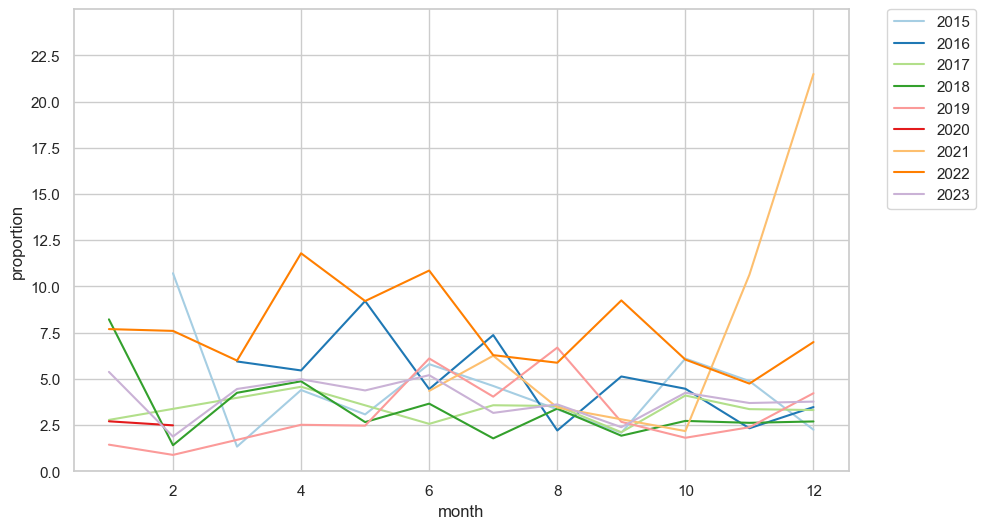

In [349]:
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)&(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = rb[(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g2=group.agg({'rating_score':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2

g1['proportion']=(g1['count_g1']/g2['count_g2'])*100  #<-------- CAREFUL !!! WRONG!! SO WRONG
g1.drop(columns='proportion', axis=1,inplace=True)

g3=pd.merge(g1, g2, how='inner', left_on=['year','month'], right_on=['year','month'] )
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

g3=g3[g3['count_g2']>10]

#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.lineplot(data=g3, x='month',y='proportion',hue='year', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=25)
ax.set(yticks=np.arange(0, 25, 2.5))
#ax.set_xlim(xmin=-1.5,xmax=12.5)




  vehicle_category in_or_outbound  count_g1  count_g2  proportion
0             Limo        Inbound        33      1536    2.148438
1             Limo       Outbound        12       558    2.150538
2             SUV4        Inbound         3       649    0.462250
3             SUV4       Outbound         2       562    0.355872
4             SUV6        Inbound       213     14645    1.454421
5             SUV6       Outbound       147     12280    1.197068
6            Sedan        Inbound       221     14335    1.541681
7            Sedan       Outbound       140     11711    1.195457
8              Van        Inbound        76      3201    2.374258
9              Van       Outbound        44      2780    1.582734


/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/4202173823.py:35: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=g3, x='vehicle_category',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11),s=100)


[Text(0.5, 0, 'Vehicle Category'),
 Text(0, 0.5, 'Issues over total bookings %')]

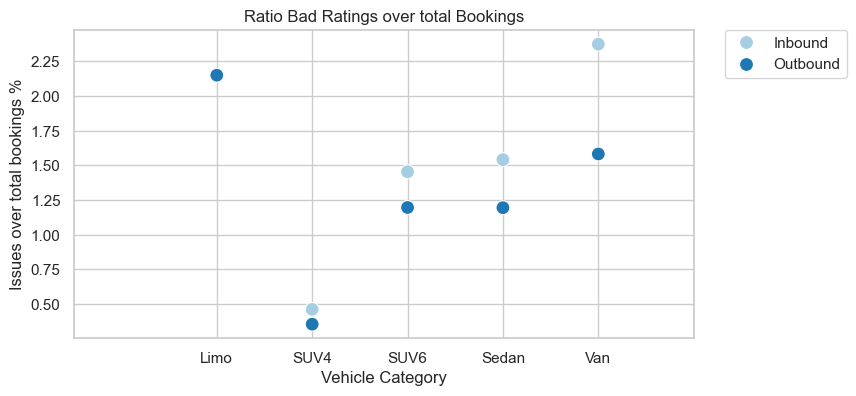

In [330]:
#By Vehicle
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)].groupby([rb['vehicle_category'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = book.groupby(['vehicle_category','in_or_outbound'])
g2=group.agg({'booking_id':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2


g3=pd.merge(g1, g2, how='inner', left_on=['vehicle_category','in_or_outbound'], right_on=['vehicle_category','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

print(g3)

#g3=g3[g3['count_g2']>10]

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='vehicle_category',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11),s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 10, 1))
ax.set_xlim(xmin=-1.5,xmax=5)
plt.title('Ratio Bad Ratings over total Bookings')
ax.set(xlabel='Vehicle Category', ylabel='Issues over total bookings %')

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/3289483218.py:31: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11), s=100)


,day_in_advance_groups,in_or_outbound,count_g2
0,G01_12 hour,Inbound,256
1,G01_12 hour,Outbound,130
2,G02_24 hour,Inbound,1672
3,G02_24 hour,Outbound,939
4,G03_48 hour,Inbound,2991
5,G03_48 hour,Outbound,981
6,G04_4 day,Inbound,3764
7,G04_4 day,Outbound,711
8,G05_1 week,Inbound,3900
9,G05_1 week,Outbound,1599


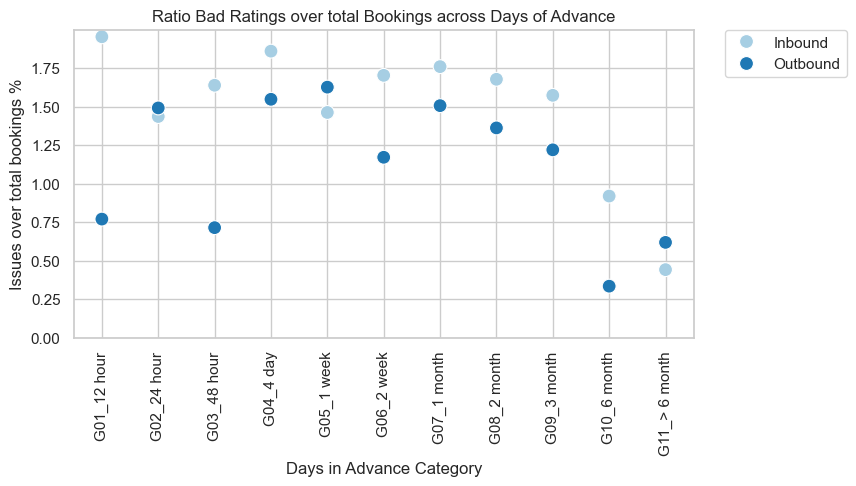

In [331]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)].groupby(['day_in_advance_groups','in_or_outbound'])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
g1

group = book.groupby(['day_in_advance_groups','in_or_outbound'])
g2=group.agg({'booking_id':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
g2

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','in_or_outbound'], right_on=['day_in_advance_groups','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100
g3

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11), s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=2)
ax.set(yticks=np.arange(0, 2, .25))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)
plt.title('Ratio Bad Ratings over total Bookings across Days of Advance')
ax.set(xlabel='Days in Advance Category', ylabel='Issues over total bookings %')
'''
There are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.
'''
g2

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/2705574666.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', palette=sns.color_palette("Paired", n_colors=11), s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,day_in_advance_groups,count_g2
0,G01_12 hour,386
1,G02_24 hour,2618
2,G03_48 hour,3982
3,G04_4 day,4504
4,G05_1 week,5513
5,G06_2 week,12193
6,G07_1 month,13856
7,G08_2 month,8992
8,G09_3 month,4026
9,G10_6 month,4169


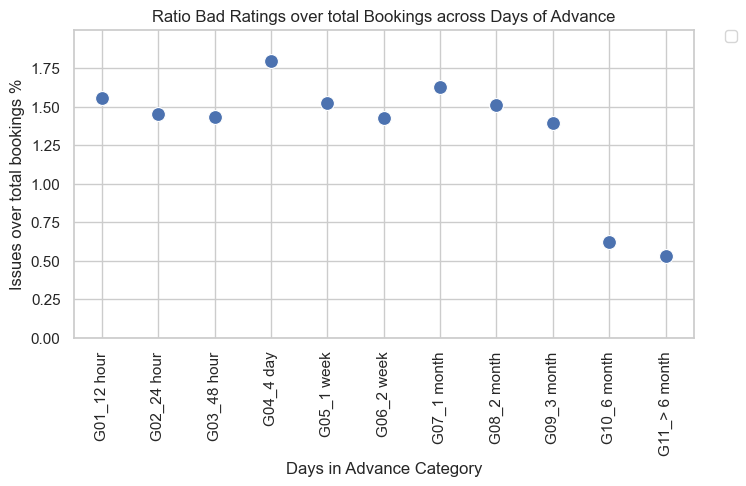

In [332]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)].groupby(['day_in_advance_groups'])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
g1

group = book.groupby(['day_in_advance_groups'])
g2=group.agg({'booking_id':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
g2

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups'], right_on=['day_in_advance_groups'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100
g3

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', palette=sns.color_palette("Paired", n_colors=11), s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=2)
ax.set(yticks=np.arange(0, 2, .25))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)
plt.title('Ratio Bad Ratings over total Bookings across Days of Advance')
ax.set(xlabel='Days in Advance Category', ylabel='Issues over total bookings %')
'''
There are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.
'''
g2

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/1761288570.py:36: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', style='vehicle_category', palette=sns.color_palette("Paired", n_colors=11))


'\nThere are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.\n'

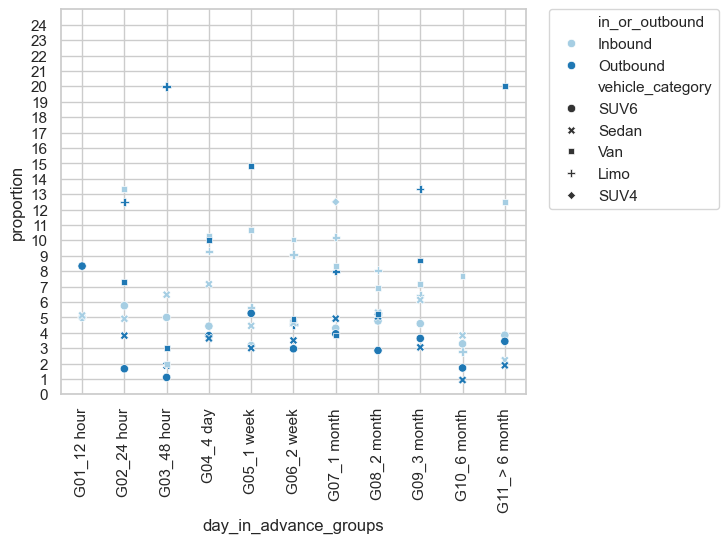

In [333]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100


group = rb[(rb['rating_score']<=2)&(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['day_in_advance_groups'],rb['vehicle_category'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = rb[(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['day_in_advance_groups'],rb['vehicle_category'],rb['in_or_outbound']])
g2=group.agg({'rating_score':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2

g1['proportion']=(g1['count_g1']/g2['count_g2'])*100  #<-------- CAREFUL !!! WRONG!! SO WRONG
g1.drop(columns='proportion', axis=1,inplace=True)

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','vehicle_category','in_or_outbound'], right_on=['day_in_advance_groups','vehicle_category','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

#g3=g3[g3['count_g2']>10]

#VISUALIZATION
width = 6
height = 5
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', style='vehicle_category', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=25)
ax.set(yticks=np.arange(0, 25, 1))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)
'''
There are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.
'''

'Because SUV4 started being available since October 27th 2023 and customers\nand most bookings have taken place on the busiest times, SUV4 lack quiet time\nto compensate a bit like the other can.\nAlso the nature of SUV4 is esentially the same as Sedan and SUV 6 so no different\nresults should be expected.\n'

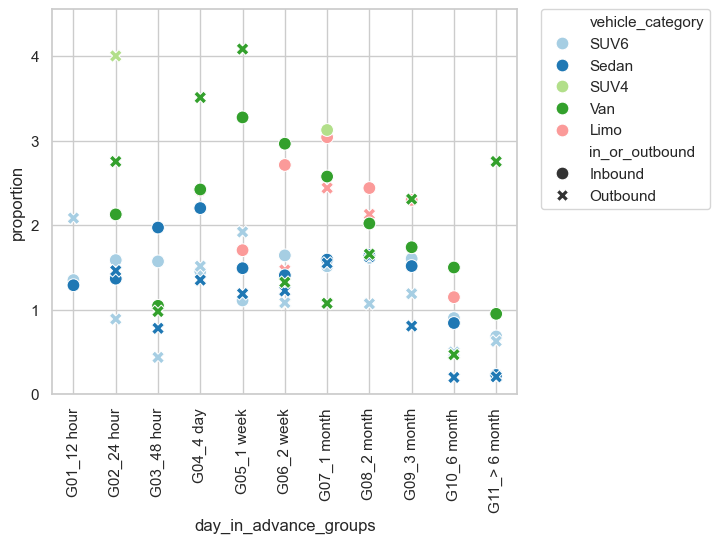

In [334]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100


group = rb[(rb['rating_score']<=2)].groupby([rb['day_in_advance_groups'],rb['vehicle_category'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
g1

group = book.groupby(['day_in_advance_groups','vehicle_category','in_or_outbound'])
g2=group.agg({'booking_id':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
g2

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','vehicle_category','in_or_outbound'], right_on=['day_in_advance_groups','vehicle_category','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

g3=g3[g3['count_g2']>20]

#VISUALIZATION
width = 6
height = 5
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='vehicle_category', style='in_or_outbound', palette=sns.color_palette("Paired", n_colors=5), s=85)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=4.55)
ax.set(yticks=np.arange(0, 4.5, 1))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)

'''Because SUV4 started being available since October 27th 2023 and customers
and most bookings have taken place on the busiest times, SUV4 lack quiet time
to compensate a bit like the other can.
Also the nature of SUV4 is esentially the same as Sedan and SUV 6 so no different
results should be expected.
'''

(-1.5, 360.0)

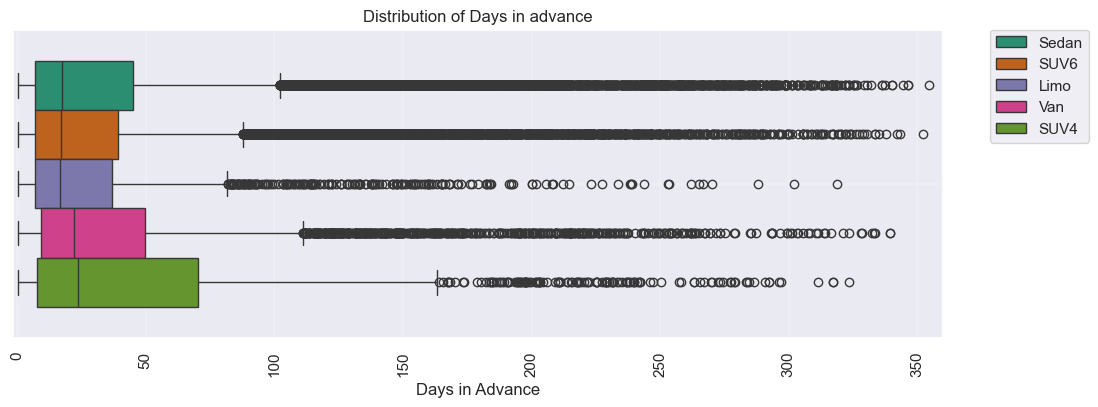

In [335]:
#NEXT BOXPLOT DAYS_IN_ADVANCE BY VEHICLE

#VISUALIZATION
width = 12
height = 4

sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(width, height)})
ax=sns.boxplot(data=book,x='days_in_advance', hue='vehicle_category', palette='Dark2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(linewidth=0.25)
plt.title('Distribution of Days in advance')
ax.set(xlabel='Days in Advance')
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
#ax.set(xticks=np.arange(0, 360, 7))
#ax.set_xlim(xmin=-1.5,xmax=100)
plt.xticks(rotation=90)

#ax.set_ylim(ymin=0 ,ymax=2)
#ax.set(yticks=np.arange(0, 2, .25))
ax.set_xlim(xmin=-1.5,xmax=360)
#plt.xticks(rotation=90)


(-1.5, 169.0)

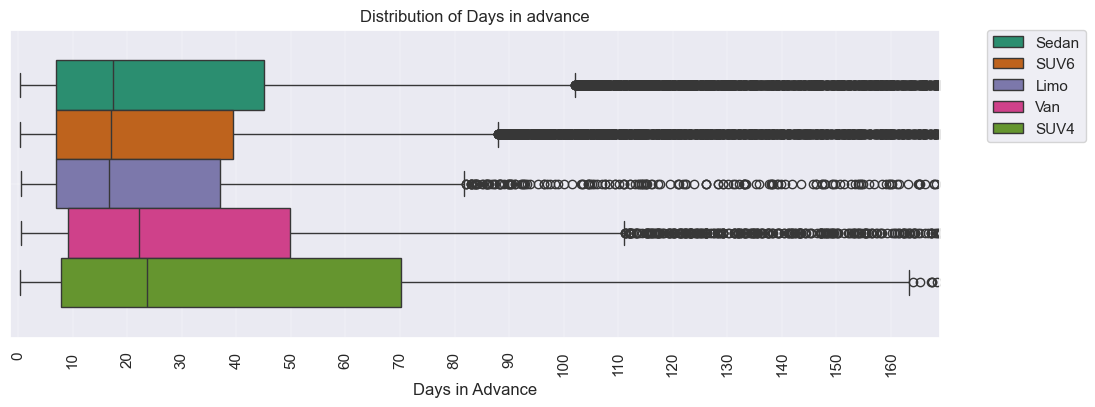

In [336]:
#NEXT BOXPLOT DAYS_IN_ADVANCE BY VEHICLE

#VISUALIZATION
width = 12
height = 4

sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(width, height)})
ax=sns.boxplot(data=book,x='days_in_advance', hue='vehicle_category', palette='Dark2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(linewidth=0.25)
plt.title('Distribution of Days in advance')
ax.set(xlabel='Days in Advance')
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
ax.set(xticks=np.arange(0, 170, 10))
#ax.set_xlim(xmin=-1.5,xmax=100)
plt.xticks(rotation=90)

#ax.set_ylim(ymin=0 ,ymax=2)
#ax.set(yticks=np.arange(0, 2, .25))
ax.set_xlim(xmin=-1.5,xmax=169)
#plt.xticks(rotation=90)


In [337]:
g=rb[rb['vehicle_category']=='SUV4']
g.sort_values(by='booking_date', ascending=True).describe()

,pickup_date,number_of_passenger,total_price,total_comission,total_driver,last_update_date,booking_date,rating_score,rating_date,days_in_advance,address_lat,address_loc
count,207,207.000000,207.000000,207.0,207.000000,207,207,207.000000,207,207.000000,22.000000,22.000000
mean,2023-12-21 11:53:54.782608640,3.521739,128.884058,12.5,89.734300,2023-12-20 19:13:01.739130624,2023-12-05 15:28:31.594203136,4.787440,2023-12-22 16:52:41.159420416,15.850963,38.291317,-75.257147
min,2023-10-28 18:00:00,2.000000,113.000000,12.5,75.000000,2023-10-28 09:45:00,2023-10-27 10:03:00,1.000000,2023-10-29 00:03:00,0.297917,-2.199279,-96.892700
25%,2023-12-06 14:32:30,3.000000,120.000000,12.5,85.000000,2023-12-05 14:37:30,2023-11-18 11:02:00,5.000000,2023-12-07 11:44:30,4.882292,40.747088,-73.994183
50%,2023-12-23 17:00:00,4.000000,130.000000,12.5,90.000000,2023-12-22 18:00:00,2023-12-02 11:58:00,5.000000,2023-12-24 02:43:00,11.191667,40.754357,-73.990689
75%,2024-01-04 14:15:00,4.000000,130.000000,12.5,90.000000,2024-01-03 14:15:00,2023-12-22 07:27:30,5.000000,2024-01-05 01:41:30,24.916319,40.764068,-73.982956
max,2024-02-04 15:05:00,4.000000,182.000000,12.5,130.000000,2024-02-05 09:23:00,2024-02-03 03:22:00,5.000000,2024-02-05 08:46:00,64.798611,41.560640,-73.041630
std,NaN,0.695520,11.252447,0.0,8.232185,NaN,NaN,0.663352,NaN,14.856208,9.408095,5.000070


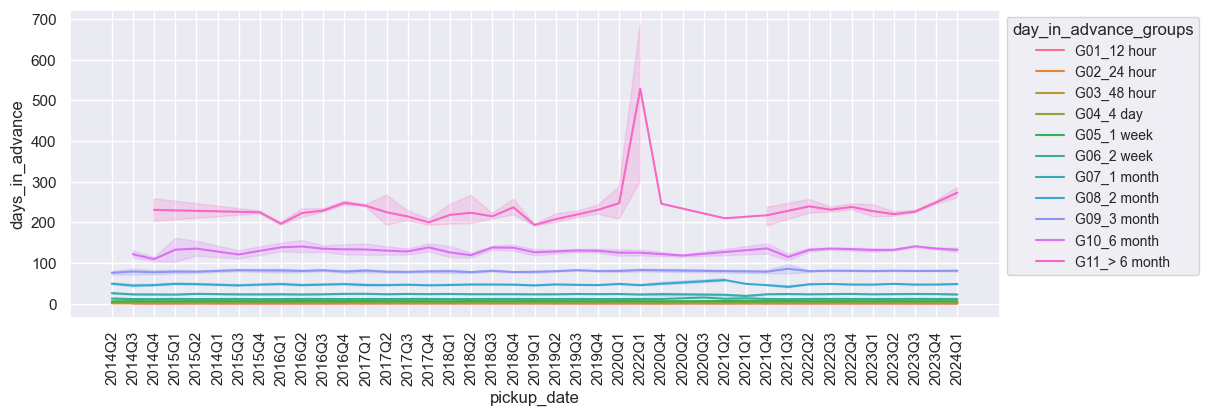

In [338]:
book.dtypes
dd=book[['pickup_date','days_in_advance','day_in_advance_groups']]
dd=dd[dd['pickup_date']<'2024-02-01']
dd['pickup_date']=dd['pickup_date'].dt.to_period('Q').astype(str)
dd['day_in_advance_groups']=dd['day_in_advance_groups'].astype('category')
ax=sns.lineplot(data=dd, x=dd['pickup_date'] ,y='days_in_advance', hue='day_in_advance_groups')
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


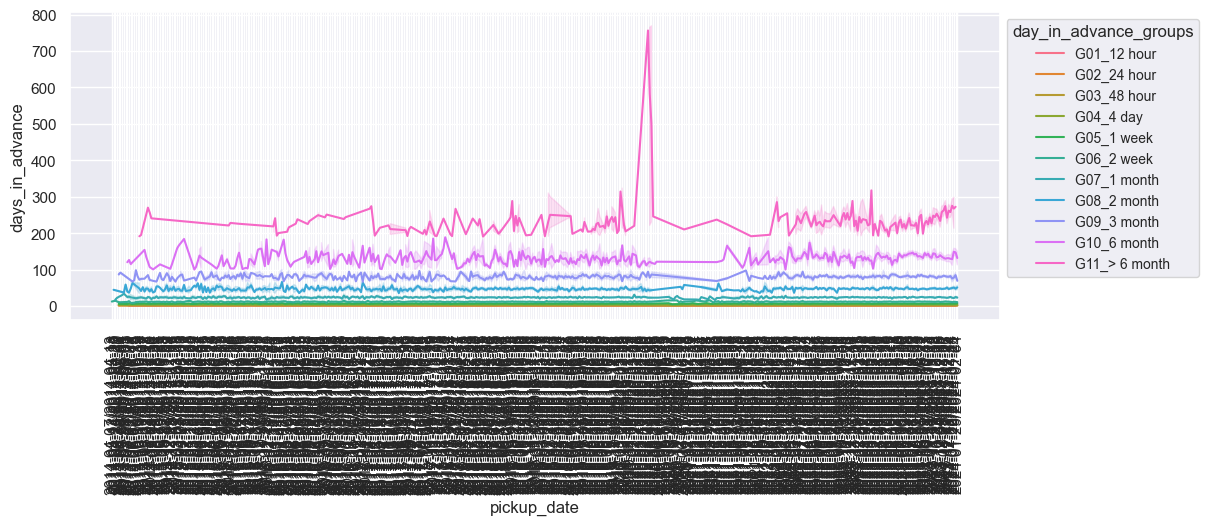

In [339]:
book.dtypes
dd=book[['pickup_date','days_in_advance','day_in_advance_groups']]
dd=dd[dd['pickup_date']<'2024-02-01']
dd['pickup_date']=dd['pickup_date'].dt.to_period('W').astype(str)
dd['day_in_advance_groups']=dd['day_in_advance_groups'].astype('category')
ax=sns.lineplot(data=dd, x=dd['pickup_date'] ,y='days_in_advance', hue='day_in_advance_groups')
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


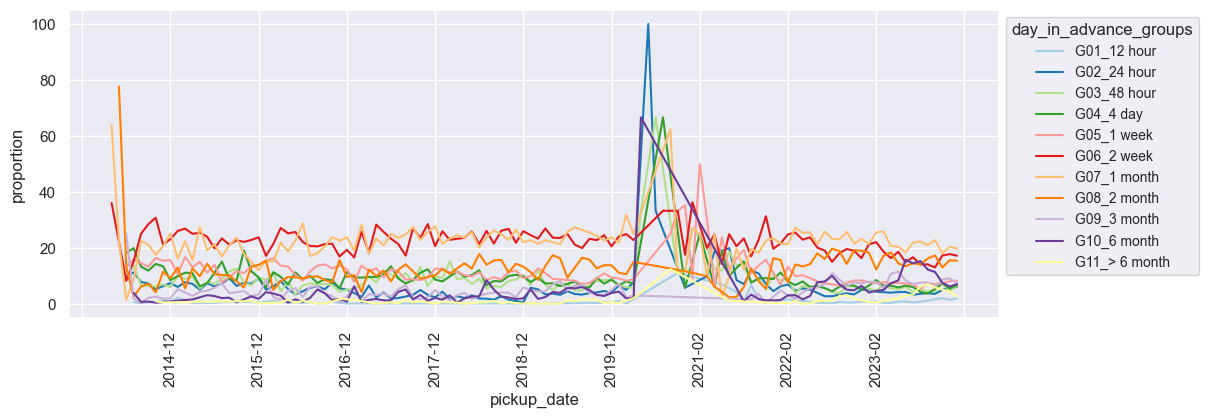

In [340]:
book.dtypes
dd=book[['pickup_date','day_in_advance_groups', 'booking_id']]
dd=dd[dd['pickup_date']<'2024-02-01']
dd['pickup_date']=dd['pickup_date'].dt.to_period('M').astype(str)
dd['booking_id']=1

dd_total=book[['pickup_date','booking_id']]
dd_total=dd_total[dd_total['pickup_date']<'2024-02-01']
dd_total['pickup_date']=dd_total['pickup_date'].dt.to_period('M').astype(str)
dd_total['booking_id']=1

d1=dd.groupby(['pickup_date', 'day_in_advance_groups'])
d1gru=d1.agg({'booking_id':['count']})
d1gru.columns=['count_dd']
d1gru.reset_index(inplace=True)
d1gru

d2=dd_total.groupby(['pickup_date'])
d2gru=d2.agg({'booking_id':['count']})
d2gru.columns=['count_total']
d2gru.reset_index(inplace=True)
d2gru


gdata=pd.merge(d1gru,d2gru, how='left', left_on='pickup_date', right_on='pickup_date')
gdata['proportion']=gdata['count_dd']/gdata['count_total']*100
gdata['day_in_advance_groups']=gdata['day_in_advance_groups'].astype('category')
ax=sns.lineplot(data=gdata, x='pickup_date' ,y='proportion', hue='day_in_advance_groups', palette=sns.color_palette("Paired", n_colors=11))

#ax.set(yticks=np.arange(0, 360, 5))
ax.set(xticks=np.arange(-4, 124, 12))

plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


In [341]:
#Time from Booking to Pickup
#Calculate number of days.
#Express it in groups that make sense.

def time_delta_only_in_days(td):
    if td.days+((td.seconds/3600)/24) <= 0.29:
        return np.nan
    else:
        return td.days+((td.seconds/3600)/24) #convert seconds to hours and hours to days.

def make_days_in_advance_groups_2(n):
    if (n<=1.2):
        return 'G01_24 hour'
    elif (n>1.2)&(n<=8):
        return 'G02_1 week'
    elif (n>8) & (n<=16):
        return 'G03_2 week'
    elif (n>16) & (n<=34):
        return 'G04_1 month'
    elif (n>34) & (n<=190):
        return 'G05_6 month'
    elif (n>190):
        return 'G06_> 6 month'
    else:
        return np.nan

#Applied to Bookings that have ratings: 
rb['days_in_advance']=pd.DataFrame(rb['pickup_date']-rb['booking_date'])
rb['days_in_advance']=rb['days_in_advance'].apply(time_delta_only_in_days)
print(rb['days_in_advance'].describe())

rb['day_in_advance_groups_2']=rb['days_in_advance'].apply(make_days_in_advance_groups_2)
rb['day_in_advance_groups_2'].value_counts(dropna=False)

#rb[rb['days_in_advance']<.4].sort_values(by='days_in_advance')


#Applied to all Bookings
book['days_in_advance']=pd.DataFrame(book['pickup_date']-book['booking_date'])
book['days_in_advance']=book['days_in_advance'].apply(time_delta_only_in_days)
print(book['days_in_advance'].describe())

book['day_in_advance_groups_2']=book['days_in_advance'].apply(make_days_in_advance_groups_2)
book['day_in_advance_groups_2'].value_counts(dropna=False)

#book[book['days_in_advance']<.25].sort_values(by='days_in_advance')


count    19999.000000
mean        30.504223
std         39.563313
min          0.292361
25%          6.972222
50%         16.423611
75%         36.985069
max        340.183333
Name: days_in_advance, dtype: float64
count    62117.000000
mean        37.013866
std         51.452183
min          0.292361
25%          7.102778
50%         17.561111
75%         42.861111
max        769.075694
Name: days_in_advance, dtype: float64


day_in_advance_groups_2
G05_6 month      17187
G02_1 week       13999
G04_1 month      13856
G03_2 week       12193
G01_24 hour       3004
G06_> 6 month     1878
NaN                262
Name: count, dtype: int64

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/1588616388.py:29: UserWarning: The palette list has more values (11) than needed (6), which may not be intended.
  ax=sns.lineplot(data=gdata, x='booking_date' ,y='proportion', hue='day_in_advance_groups_2', palette=sns.color_palette("Paired", n_colors=11))


'\nThere are some interesting things going on here with the duration that might require further study.\nI see the 1 month and 2 month lines have complementary behavior. When one goes up the other goes down.\n\nThe six month grows towards a 6 month big date and then goes down and the smaller ones pickup.\n\nLast minute reservations go up when there are a lot of people. blue\n\n'

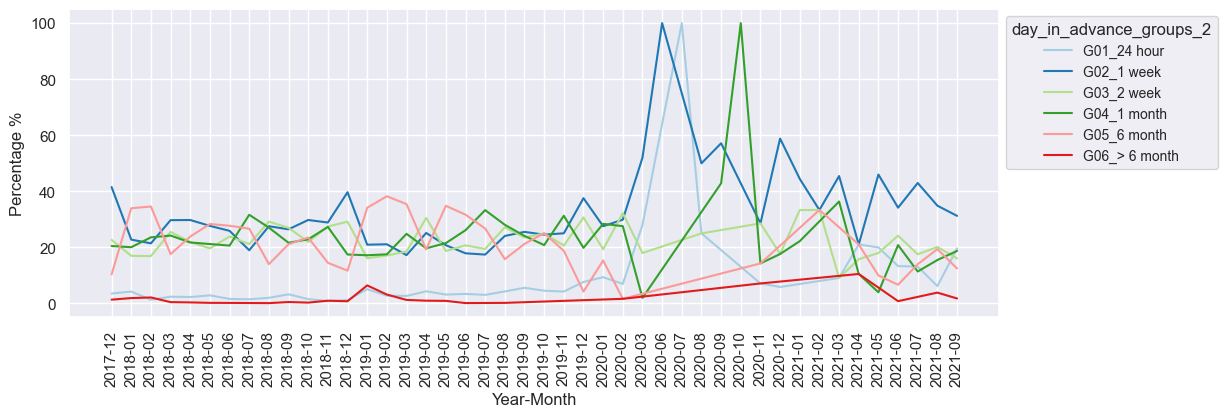

In [342]:
dd=book[['booking_date','day_in_advance_groups_2', 'booking_id']]
dd=dd[(dd['booking_date']>'2017-12-01')&(dd['booking_date']<'2021-10-01')]
dd['booking_date']=dd['booking_date'].dt.to_period('M').astype(str)
dd['booking_id']=1

dd_total=book[['booking_date','booking_id']]
dd_total=dd_total[(dd_total['booking_date']>'2017-12-01')&(dd_total['booking_date']<'2021-10-01')]
dd_total['booking_date']=dd_total['booking_date'].dt.to_period('M').astype(str)
dd_total['booking_id']=1

d1=dd.groupby(['booking_date', 'day_in_advance_groups_2'])
d1gru=d1.agg({'booking_id':['count']})
d1gru.columns=['count_dd']
d1gru.reset_index(inplace=True)
#d1gru

d2=dd_total.groupby(['booking_date'])
d2gru=d2.agg({'booking_id':['count']})
d2gru.columns=['count_total']
d2gru.reset_index(inplace=True)
#d2gru


gdata=pd.merge(d1gru,d2gru, how='left', left_on='booking_date', right_on='booking_date')
gdata['proportion']=gdata['count_dd']/gdata['count_total']*100
gdata['day_in_advance_groups_2']=gdata['day_in_advance_groups_2'].astype('category')
gdata

ax=sns.lineplot(data=gdata, x='booking_date' ,y='proportion', hue='day_in_advance_groups_2', palette=sns.color_palette("Paired", n_colors=11))
ax.set(xlabel='Year-Month', ylabel='Percentage %')
#ax.set(yticks=np.arange(0, 30, 5))
#ax.set(xticks=np.arange(2, 24, 1))

plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


'''
There are some interesting things going on here with the duration that might require further study.
I see the 1 month and 2 month lines have complementary behavior. When one goes up the other goes down.

The six month grows towards a 6 month big date and then goes down and the smaller ones pickup.

Last minute reservations go up when there are a lot of people. blue

'''

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/1400615930.py:15: UserWarning: The palette list has more values (11) than needed (6), which may not be intended.
  ax=sns.histplot(


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-06'),
  Text(16, 0, '2020-07'),
  Text(17, 0, '2020-08'),
  Text(18, 0, '2020-09'),
  Text(19, 0, '2020-10'),
  Text(20, 0, '2020-11'),
  Text(21, 0, '2020-12'),
  Text(22, 0, '2021-01'),
  Text(23, 0, '2021-02'),
  Text(24, 0, '2021-03'),
  Text(25, 0, '2021-04'),
  Text(26, 0, '2021-05'),
  Text(27, 0, '2021-06'),
  Text(28, 0, '2021-07'),
  Text(29, 0, '2021-08'),
  Tex

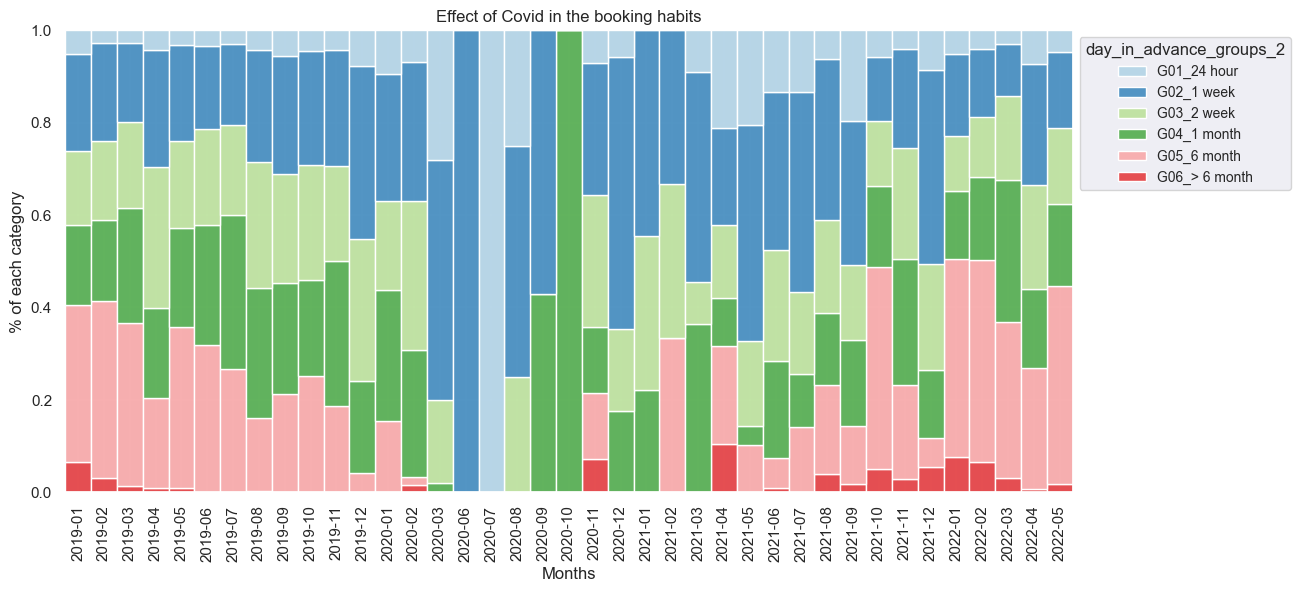

In [343]:
df_stacks=book[['booking_date','day_in_advance_groups_2', 'booking_id']]
df_stacks=df_stacks[~(df_stacks['day_in_advance_groups_2'].isna())]
df_stacks=df_stacks[(df_stacks['booking_date']>'2019-1-01')&(df_stacks['booking_date']<'2022-6-01')]
df_stacks['booking_date']=df_stacks['booking_date'].dt.to_period('M').astype(str)
df_stacks['day_in_advance_groups_2']=df_stacks['day_in_advance_groups_2'].astype('category')
df_stacks['booking_id']=1
df_stacks.sort_values(by='booking_date' ,inplace=True)
#df_stacks.dtypes

#VISUALIZATION
width = 13
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=df_stacks,
    x="booking_date", hue="day_in_advance_groups_2",
    multiple="fill", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    
    #shrink=.8
)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)
ax.grid(linewidth=0.25)

plt.title('Effect of Covid in the booking habits')
ax.set(xlabel='Months')
ax.set(ylabel='''% of each category''')
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
#ax.set(xticks=np.arange(0, 170, 10))
#ax.set_xlim(xmin=-1.5,xmax=100)
plt.xticks(rotation=90)

#ax.set_ylim(ymin=0 ,ymax=2)
#ax.set(yticks=np.arange(0, 2, .25))
#ax.set_xlim(xmin=-1.5,xmax=169)
#plt.xticks(rotation=90)

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/946169681.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.histplot(


(array([17897., 18078., 18262., 18444., 18628., 18809., 18993., 19174.]),
 [Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07')])

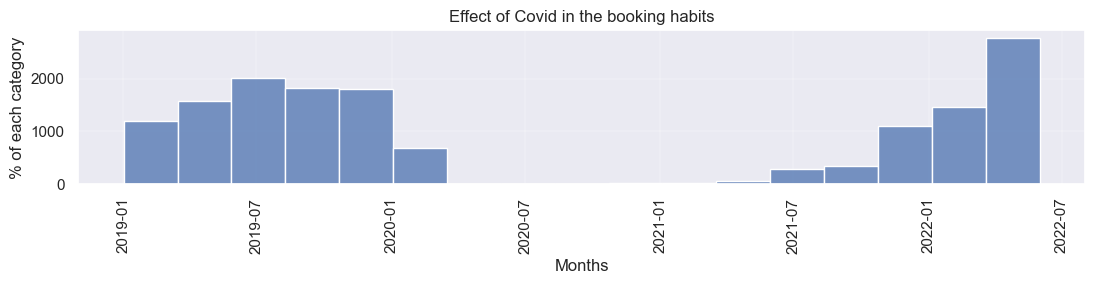

In [344]:
#VISUALIZATION
width = 13
height = 2
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=book[((book['booking_date']>'2019-1-01')&(book['booking_date']<'2022-6-01'))],
    x="booking_date", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    )
plt.xticks(rotation=90)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)
ax.grid(linewidth=0.25)

plt.title('Effect of Covid in the booking habits')
ax.set(xlabel='Months')
ax.set(ylabel='''% of each category''')
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
#ax.set(xticks=np.arange(0, 170, 10))
#ax.set_xlim(xmin=-1.5,xmax=100)
plt.xticks(rotation=90)

#ax.set_ylim(ymin=0 ,ymax=2)
#ax.set(yticks=np.arange(0, 2, .25))
#ax.set_xlim(xmin=-1.5,xmax=169)
#plt.xticks(rotation=90)

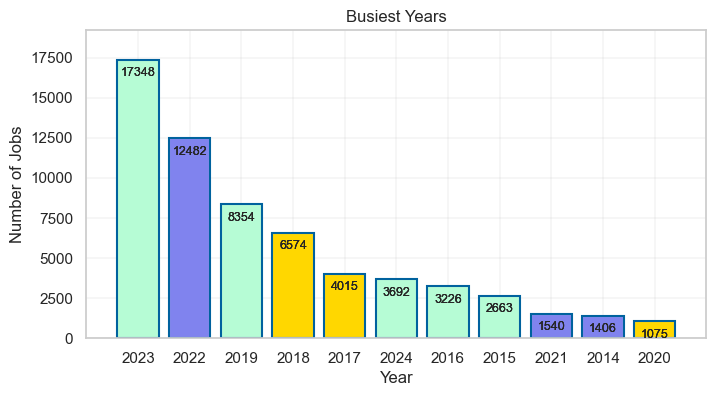

In [345]:
#Busiest Years

#DATA
group = book[book['pickup_date'].dt.year<2025].groupby(book['pickup_date'].dt.year)
g1=group.agg({'booking_id':['count']})
g1.columns=['count']
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#8083ee','#b6fcd5','#FFD700','#FFD700', '#b6fcd5','#b6fcd5','#b6fcd5','#8083ee','#8083ee','#FFD700']
ax=sns.barplot(data=g1, x='pickup_date',y='count',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6,7,8,9,10],g1['count'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='count',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)

ax.set_ylim(ymin=0 ,ymax=19200)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Busiest Years')

ax.set(xlabel='Year', ylabel='Number of Jobs')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_2035/3002011222.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.histplot(


(148, 39)

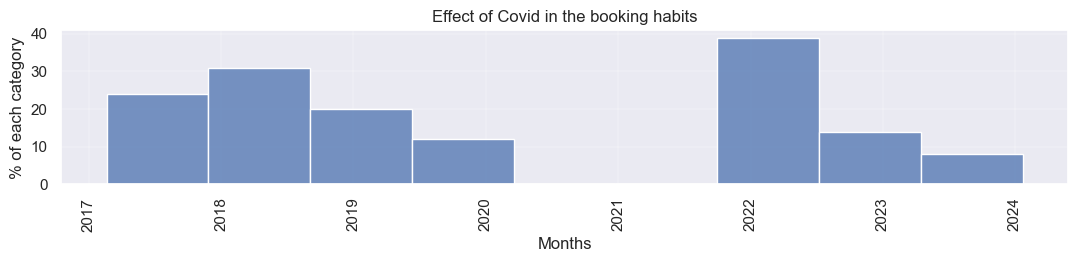

In [346]:
#VISUALIZATION
width = 13
height = 2
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=rb[((rb['status']=='cancelado'))],
    x="pickup_date", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    )
plt.xticks(rotation=90)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)
ax.grid(linewidth=0.25)

plt.title('Effect of Covid in the booking habits')
ax.set(xlabel='Months')
ax.set(ylabel='''% of each category''')
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
#ax.set(xticks=np.arange(0, 170, 10))
#ax.set_xlim(xmin=-1.5,xmax=100)
plt.xticks(rotation=90)

#ax.set_ylim(ymin=0 ,ymax=2)
#ax.set(yticks=np.arange(0, 2, .25))
#ax.set_xlim(xmin=-1.5,xmax=169)
#plt.xticks(rotation=90)

rb[rb['status']=='cancelado'].shape